## 6.(1) Softmax Classification Eager

In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

tf.random.set_seed(777)

2.0.0


In [2]:
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#dtype 변환
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

In [3]:
#dataset을 선언
# dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
# dataset = dataset.repeat().batch(2)

nb_classes = 3 #class의 개수

print(x_data.shape)
print(y_data.shape)

(8, 4)
(8, 3)


In [4]:
#Weight and bias setting
W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]

print(W,b)

<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.7706481 ,  0.37335402, -0.05576323],
       [ 0.00358377, -0.5898363 ,  1.5702795 ],
       [ 0.2460895 , -0.09918973,  1.4418385 ],
       [ 0.3200988 ,  0.526784  , -0.7703731 ]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([-1.3080608 , -0.13253094,  0.5513761 ], dtype=float32)>


In [5]:
# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
def hypothesis(X):
    return tf.nn.softmax(tf.matmul(X, W) + b)

print(hypothesis(x_data))

tf.Tensor(
[[1.36571955e-02 7.90162385e-03 9.78441238e-01]
 [3.92598137e-02 1.70347560e-02 9.43705440e-01]
 [3.80385250e-01 1.67723224e-01 4.51891541e-01]
 [3.23390484e-01 5.90759404e-02 6.17533624e-01]
 [3.62997412e-06 6.20727292e-08 9.99996305e-01]
 [2.62520462e-02 1.07279727e-02 9.63019967e-01]
 [1.56525111e-05 4.21802781e-07 9.99983907e-01]
 [2.94077745e-06 3.81134022e-08 9.99997020e-01]], shape=(8, 3), dtype=float32)


In [6]:
# Softmax onehot test
sample_db = [[8,2,1,4]]
sample_db = np.asarray(sample_db, dtype=np.float32)

print(hypothesis(sample_db))

tf.Tensor([[0.9302204  0.06200533 0.00777428]], shape=(1, 3), dtype=float32)


In [7]:
def cost_fn(X, Y):
    logits = hypothesis(X)
    cost = -tf.reduce_sum(Y * tf.math.log(logits), axis=1)
    cost_mean = tf.reduce_mean(cost)
    
    return cost_mean

print(cost_fn(x_data, y_data))

tf.Tensor(6.07932, shape=(), dtype=float32)


In [8]:
x = tf.constant(3.0)

with tf.GradientTape() as g:
    g.watch(x)
    y = x * x 
dy_dx = g.gradient(y, x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [9]:
def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)

        return grads

print(grad_fn(x_data, y_data))

[<tf.Tensor: id=106, shape=(4, 3), dtype=float32, numpy=
array([[ 0.06914611, -0.6509784 ,  0.5818323 ],
       [-1.5221257 , -1.214863  ,  2.7369888 ],
       [-1.2473828 , -1.7611002 ,  3.008483  ],
       [-1.2014606 , -1.865923  ,  3.0673838 ]], dtype=float32)>, <tf.Tensor: id=105, shape=(3,), dtype=float32, numpy=array([-0.15212911, -0.342192  ,  0.4943211 ], dtype=float32)>]


In [10]:
def fit(X, Y, epochs=2000, verbose=100):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
            print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            
fit(x_data, y_data) # model fitting -> cost 값이 계속 감소하는 거 확인

Loss at epoch 1: 2.849417
Loss at epoch 100: 0.684151
Loss at epoch 200: 0.613813
Loss at epoch 300: 0.558204
Loss at epoch 400: 0.508305
Loss at epoch 500: 0.461059
Loss at epoch 600: 0.415072
Loss at epoch 700: 0.369636
Loss at epoch 800: 0.324533
Loss at epoch 900: 0.280721
Loss at epoch 1000: 0.246752
Loss at epoch 1100: 0.232798
Loss at epoch 1200: 0.221645
Loss at epoch 1300: 0.211476
Loss at epoch 1400: 0.202164
Loss at epoch 1500: 0.193606
Loss at epoch 1600: 0.185714
Loss at epoch 1700: 0.178415
Loss at epoch 1800: 0.171645
Loss at epoch 1900: 0.165350
Loss at epoch 2000: 0.159483


### Prediction Check

In [11]:
sample_data = [[2,1,3,2]] # answer_label is about [[0,0,1]]
sample_data = np.asarray(sample_data, dtype=np.float32)

a = hypothesis(sample_data)

print(a)
print(tf.argmax(a, 1)) #index: 2

tf.Tensor([[0.00112886 0.08154671 0.9173244 ]], shape=(1, 3), dtype=float32)
tf.Tensor([2], shape=(1,), dtype=int64)


In [12]:
b = hypothesis(x_data)
print(b)
print(tf.argmax(b, 1)) #tf.argmax(b,1) : 2차원 배열의 각 행에서 큰 값을 찾아 index return
print(tf.argmax(y_data, 1))

tf.Tensor(
[[2.1975952e-06 1.2331187e-03 9.9876475e-01]
 [1.1288583e-03 8.1546709e-02 9.1732442e-01]
 [2.2205577e-07 1.6418636e-01 8.3581340e-01]
 [6.3921816e-06 8.5045439e-01 1.4953929e-01]
 [2.6150790e-01 7.2644752e-01 1.2044572e-02]
 [1.3783246e-01 8.6214006e-01 2.7417687e-05]
 [7.4242145e-01 2.5754160e-01 3.6978621e-05]
 [9.2197549e-01 7.8023978e-02 6.0006039e-07]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


### **코드 정리!**

In [13]:
class softmax_classifer(tf.keras.Model):
    def __init__(self, nb_classes):
        super(softmax_classifer, self).__init__()
        self.W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
        self.b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
        
    def softmax_regression(self, X):
        return tf.nn.softmax(tf.matmul(X, self.W) + self.b)
    
    def cost_fn(self, X, Y):
        logits = self.softmax_regression(X)
        cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(logits), axis=1))        
        return cost
    
    def grad_fn(self, X, Y):
        with tf.GradientTape() as tape:
            cost = self.cost_fn(x_data, y_data)
            grads = tape.gradient(cost, self.variables)            
            return grads
    
    def fit(self, X, Y, epochs=2000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

        for i in range(epochs):
            grads = self.grad_fn(X, Y)
            optimizer.apply_gradients(zip(grads, self.variables))
            if (i==0) | ((i+1)%verbose==0):
                print('Loss at epoch %d: %f' %(i+1, self.cost_fn(X, Y).numpy()))
            
model = softmax_classifer(nb_classes)
model.fit(x_data, y_data)

Loss at epoch 1: 2.472669
Loss at epoch 500: 0.375229
Loss at epoch 1000: 0.229923
Loss at epoch 1500: 0.182147
Loss at epoch 2000: 0.150633


## 6.(2) Softmax Zoo_classifier eager

In [16]:
path = 'C:/Users/1216k/Desktop/TensorFlow-master/TensorFlow-master/tf_2.x/'

xy = np.loadtxt(path+'data-04-zoo.csv', delimiter=',', dtype=np.float32)
print(xy)

[[1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 3.]
 ...
 [1. 0. 0. ... 0. 1. 0.]
 [0. 0. 1. ... 0. 0. 6.]
 [0. 1. 1. ... 0. 0. 1.]]


In [17]:
x_data = xy[:, 0:-1]
y_data = xy[:, -1]

nb_classes = 7  # 0 ~ 6

# Make Y data as onehot shape
Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes)
print(x_data.shape, Y_one_hot.shape)

(101, 16) (101, 7)


In [18]:
#Weight and bias setting
W = tf.Variable(tf.random.normal((16, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]

def logit_fn(X):
    return tf.matmul(X, W) + b

def hypothesis(X):
    return tf.nn.softmax(logit_fn(X))

def cost_fn(X, Y):
    logits = logit_fn(X)
    cost_i = tf.keras.losses.categorical_crossentropy(y_true=Y, y_pred=logits, 
                                                      from_logits=True)    
    cost = tf.reduce_mean(cost_i)    
    return cost

def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads
    
def prediction(X, Y):
    pred = tf.argmax(hypothesis(X), 1)
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return accuracy

In [19]:
def fit(X, Y, epochs=1000, verbose=100):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
            acc = prediction(X, Y).numpy()
            loss = cost_fn(X, Y).numpy() 
            print('Steps: {} Loss: {}, Acc: {}'.format(i+1, loss, acc))

fit(x_data, Y_one_hot)

Steps: 1 Loss: 6.631802558898926, Acc: 0.10891088843345642
Steps: 100 Loss: 0.572661817073822, Acc: 0.8514851331710815
Steps: 200 Loss: 0.3897223472595215, Acc: 0.9009901285171509
Steps: 300 Loss: 0.3014775812625885, Acc: 0.9108911156654358
Steps: 400 Loss: 0.24435144662857056, Acc: 0.9306930899620056
Steps: 500 Loss: 0.20434372127056122, Acc: 0.9405940771102905
Steps: 600 Loss: 0.17501822113990784, Acc: 0.9702970385551453
Steps: 700 Loss: 0.1527751386165619, Acc: 0.9900990128517151
Steps: 800 Loss: 0.13542766869068146, Acc: 0.9900990128517151
Steps: 900 Loss: 0.12156669050455093, Acc: 0.9900990128517151
Steps: 1000 Loss: 0.11025162786245346, Acc: 0.9900990128517151


## 7.(1) Learning rate and Evaluation

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

- x_data : 3-dimension 
- 파랑 : 2, 초록 :1 , 빨강 : 0

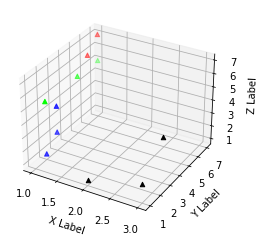

In [21]:
x_train = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]

y_train = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# test data
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]


x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]
x3 = [x[2] for x in x_train]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=y_train, marker='^')

ax.scatter(x_test[0][0], x_test[0][1], x_test[0][2], c="black", marker='^')
ax.scatter(x_test[1][0], x_test[1][1], x_test[1][2], c="black", marker='^')
ax.scatter(x_test[2][0], x_test[2][1], x_test[2][2], c="black", marker='^')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

### Tensorflow

In [23]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [24]:
#W,b setup
W = tf.Variable(tf.random.normal((3, 3)))
b = tf.Variable(tf.random.normal((3,)))

- Softmax fuction -> hypothesis

In [25]:
def softmax_fn(features):
    hypothesis = tf.nn.softmax(tf.matmul(features, W) + b)
    return hypothesis

- 가설을 검증할 Cost function 정의 (Cross Entropy loss 사용)

In [26]:
def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(-tf.reduce_sum(labels * tf.math.log(hypothesis), axis=1))
    return cost

### Learning Rate 값을 조정하기 위한 Learning Decay 설정

#### Parameters
1. starter_learning_rate : 최초 학습시 사용될 learning rate (0.1로 설정하여 0.96씩 감소하는지 확인)
2. global_step : 현재 학습 횟수
3. 1000 : 곱할 횟수 정의 (1000번에 마다 적용)
4. 0.96 : 기존 learning에 곱할 값
5. 적용유무 decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)

In [27]:
is_decay = True
starter_learning_rate = 0.1
    
if(is_decay):    
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                 decay_steps=1000,
                                                                 decay_rate=0.96,
                                                                 staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(softmax_fn(features),features,labels)
    return tape.gradient(loss_value, [W,b])

#### Accuracy

In [28]:
def accuracy_fn(hypothesis, labels):
    prediction = tf.argmax(hypothesis, 1)
    is_correct = tf.equal(prediction, tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    return accuracy

### Training

In [29]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads = grad(softmax_fn(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(softmax_fn(features),features,labels)))
x_test = tf.cast(x_test, tf.float32)
y_test = tf.cast(y_test, tf.float32)
test_acc = accuracy_fn(softmax_fn(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 4.0067
Iter: 100, Loss: 0.7511
Iter: 200, Loss: 0.6187
Iter: 300, Loss: 0.5528
Iter: 400, Loss: 0.5082
Iter: 500, Loss: 0.4741
Iter: 600, Loss: 0.4463
Iter: 700, Loss: 0.4230
Iter: 800, Loss: 0.4030
Iter: 900, Loss: 0.3855
Iter: 1000, Loss: 0.3700
Testset Accuracy: 1.0000


## 7.(2) Linear Regression(without min/max)

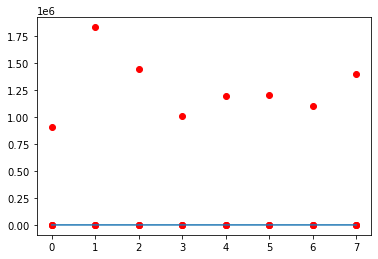

In [30]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

### Model 만들기

In [31]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [32]:
W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

* Hypothesis 설정

In [33]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

* 가설을 검정할 Cost 함수 정의(MSE 사용)

In [34]:
def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    return cost

* Training

In [35]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5)

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels)
    return tape.gradient(loss_value, [W,b]), loss_value

In [36]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        hypo_value = linearReg_fn(features)
        grads, loss_value = grad(linearReg_fn(features), features, labels)        
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))    
    print("Iter: {}, Loss: {:.4f}, Prediction: {}".format(step, loss_value, hypo_value))

Iter: 0, Loss: 799135563776.0000, Prediction: [[ -630210.25]
 [-1268059.  ]
 [ -997662.7 ]
 [ -699532.7 ]
 [ -824332.6 ]
 [ -831263.94]
 [ -761927.5 ]
 [ -969918.6 ]]
Iter: 1, Loss: 877994403772260496758013952.0000, Prediction: [[2.0901486e+13]
 [4.2076838e+13]
 [3.3100329e+13]
 [2.3203154e+13]
 [2.7346157e+13]
 [2.7576324e+13]
 [2.5274656e+13]
 [3.2179659e+13]]
Iter: 2, Loss: inf, Prediction: [[-6.9280801e+20]
 [-1.3946936e+21]
 [-1.0971551e+21]
 [-7.6909983e+20]
 [-9.0642535e+20]
 [-9.1405445e+20]
 [-8.3776256e+20]
 [-1.0666383e+21]]
Iter: 3, Loss: inf, Prediction: [[2.2964054e+28]
 [4.6229002e+28]
 [3.6366685e+28]
 [2.5492853e+28]
 [3.0044690e+28]
 [3.0297570e+28]
 [2.7768771e+28]
 [3.5355165e+28]]
Iter: 4, Loss: inf, Prediction: [[-7.61174589e+35]
 [-1.53232242e+36]
 [-1.20542282e+36]
 [-8.44994974e+35]
 [-9.95871778e+35]
 [-1.00425380e+36]
 [-9.20433336e+35]
 [-1.17189465e+36]]
Iter: 5, Loss: inf, Prediction: [[inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]
 [inf]]
Iter: 6, Loss: 

 [nan]]
Iter: 92, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 93, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 94, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 95, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 96, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 97, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 98, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 99, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Iter: 100, Loss: nan, Prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


## 7.(3) Linear Regression (normalization, decay, l2_loss)

### Scaling(0~1)

In [37]:
def normalization(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / denominator

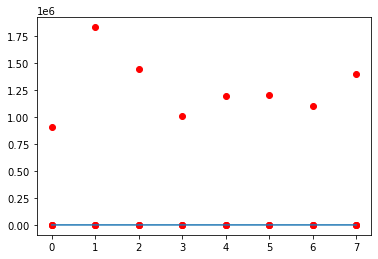

In [38]:
xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

### Normalization

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


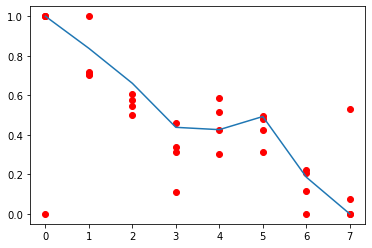

In [39]:
xy = normalization(xy)
print(xy)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)

plt.show()

### 정규화된 데이터로 모델 생성

In [40]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

In [41]:
W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

### Hypothesis 정의 (y = Wx+b)

In [42]:
def linearReg_fn(features):
    hypothesis = tf.matmul(features, W) + b
    return hypothesis

### L2 loss function 정의

- Weight의 수가 많아지면 수만큼 더한다 tf.nn.l2_loss(W2) + tf.nn.l2_loss(W3)

In [43]:
def l2_loss(loss, beta = 0.01):
    W_reg = tf.nn.l2_loss(W) # output = sum(t ** 2) / 2
    loss = tf.reduce_mean(loss + W_reg * beta)
    return loss

- Cost function 정의 (MSE 이용)

In [44]:
def loss_fn(hypothesis, features, labels, flag = False):
    cost = tf.reduce_mean(tf.square(hypothesis - labels))
    if(flag):
        cost = l2_loss(cost)
    return cost

### Learning Rate 값을 조정하기 위한 Learning Decay 설정

(추가) 6. decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)

In [45]:
is_decay = True
starter_learning_rate = 0.1

if(is_decay):    
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                  decay_steps=50,
                                                                  decay_rate=0.96,
                                                                  staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value

#### TensorFlow

In [46]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))        
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 1.3035
Iter: 10, Loss: 0.1873
Iter: 20, Loss: 0.0979
Iter: 30, Loss: 0.0522
Iter: 40, Loss: 0.0286
Iter: 50, Loss: 0.0165
Iter: 60, Loss: 0.0103
Iter: 70, Loss: 0.0070
Iter: 80, Loss: 0.0053
Iter: 90, Loss: 0.0043
Iter: 100, Loss: 0.0037


## 7.(4) MNIST intro

In [47]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [48]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu), 
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

* Adam Optimizer & Cross Entropy Loss 선언

In [49]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* Epoch = 5로 training

In [50]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 11s 181us/sample - loss: 0.2172 - accuracy: 0.9356
Epoch 2/5
60000/60000 [==============================] - 11s 182us/sample - loss: 0.0946 - accuracy: 0.9712
Epoch 3/5
60000/60000 [==============================] - 13s 212us/sample - loss: 0.0683 - accuracy: 0.9786
Epoch 4/5
60000/60000 [==============================] - 15s 255us/sample - loss: 0.0526 - accuracy: 0.9830
Epoch 5/5
60000/60000 [==============================] - 19s 322us/sample - loss: 0.0425 - accuracy: 0.9865


* Test

In [51]:
model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.0733281130246236, 0.9798]

## 7.(5) Fashion MNINT intro

In [56]:
from tensorflow import keras

In [52]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 1s 0us/step


* train_images의 4번째 : 드레스

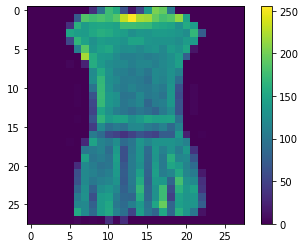

In [53]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

* 0~1 사이의 값으로 정규화 및 data 출력

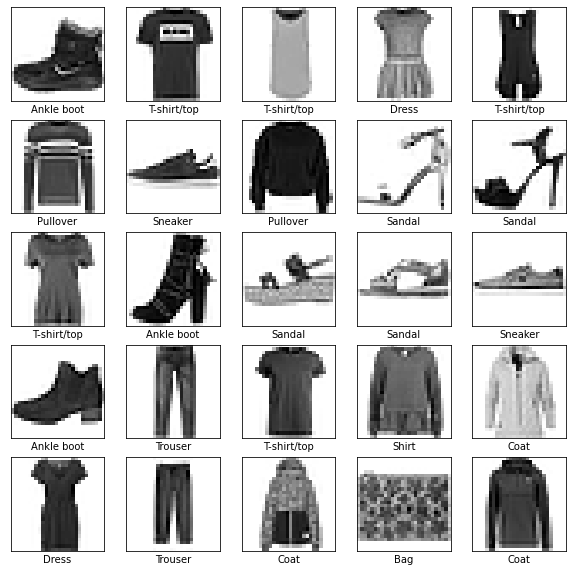

In [54]:
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

* Model 정의

In [57]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [59]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 103us/sample - loss: 0.3031 - accuracy: 0.8888
Epoch 2/5
60000/60000 [==============================] - 6s 105us/sample - loss: 0.2867 - accuracy: 0.8940
Epoch 3/5
60000/60000 [==============================] - 7s 109us/sample - loss: 0.2718 - accuracy: 0.8998
Epoch 4/5
60000/60000 [==============================] - 6s 97us/sample - loss: 0.2611 - accuracy: 0.9032
Epoch 5/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2515 - accuracy: 0.9073


In [60]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test accuracy: 0.8732


## 7.(6) IMDB intro

In [61]:
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)),'\n')
print(train_data[0])

17465344/17464789 [==============================] - 3s 0us/step


C:\Users\1216k\.conda\envs\test\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


Training entries: 25000, labels: 25000 

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


C:\Users\1216k\.conda\envs\test\lib\site-packages\tensorflow_core\python\keras\datasets\imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


* IMDB data를 Vector 실제 값으로 변환하여 출력

In [62]:
word_index = imdb.get_word_index()

word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2 
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[4])

1646592/1641221 [==============================] - 1s 1us/step


"<START> worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the <UNK> and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"

In [63]:
print(train_labels[4])

0


* data를 길이 256으로 PDA값을 줘서 맞춰줌 (뒤의 길이는 0으로!)

In [64]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

print(len(train_data[0]), len(test_data[0]))
print(train_data[0])

256 256
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  10

In [65]:
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

* Test data에 대한 정의

In [67]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 4s 246us/sample - loss: 0.6921 - accuracy: 0.6277 - val_loss: 0.6907 - val_accuracy: 0.6762
Epoch 2/40
15000/15000 [==============================] - 2s 136us/sample - loss: 0.6882 - accuracy: 0.6659 - val_loss: 0.6855 - val_accuracy: 0.7015
Epoch 3/40
15000/15000 [==============================] - 2s 134us/sample - loss: 0.6799 - accuracy: 0.7260 - val_loss: 0.6741 - val_accuracy: 0.7494
Epoch 4/40
15000/15000 [==============================] - 2s 156us/sample - loss: 0.6632 - accuracy: 0.7647 - val_loss: 0.6548 - val_accuracy: 0.7586
Epoch 5/40
15000/15000 [==============================] - 2s 133us/sample - loss: 0.6374 - accuracy: 0.7797 - val_loss: 0.6264 - val_accuracy: 0.7729
Epoch 6/40
15000/15000 [==============================] - 2s 139us/sample - loss: 0.6008 - accuracy: 0.7941 - val_loss: 0.5889 - val_accuracy: 0.7911
Epoch 7/40
15000/15000 [==========================

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

## 9.(1) XOR : Logistic Regression

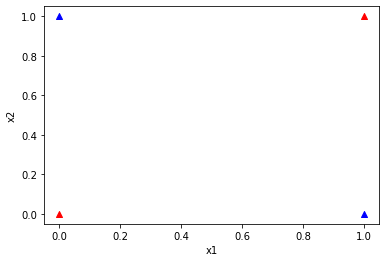

In [68]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]
y_data = [[0],
          [1],
          [1],
          [0]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [69]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

### 1. Logistic Regression으로 XOR 모델 생성

In [70]:
W = tf.Variable(tf.zeros((2,1)), name='weight')
b = tf.Variable(tf.zeros((1,)), name='bias')
print("W = {}, B = {}".format(W.numpy(), b.numpy()))

W = [[0.]
 [0.]], B = [0.]


In [71]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(tf.matmul(features, W) + b))
    return hypothesis

* Cost function 정의

In [72]:
def loss_fn(hypothesis, features, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(logistic_regression(features)) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

* Prediction을 0.5기준으로 0/1 나누기

In [73]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

* GradientTape를 통해 경사값 계산

In [74]:
def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(logistic_regression(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [75]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(logistic_regression(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),features,labels)))
print("W = {}, B = {}".format(W.numpy(), b.numpy()))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(logistic_regression(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.6931
Iter: 200, Loss: 0.6931
Iter: 300, Loss: 0.6931
Iter: 400, Loss: 0.6931
Iter: 500, Loss: 0.6931
Iter: 600, Loss: 0.6931
Iter: 700, Loss: 0.6931
Iter: 800, Loss: 0.6931
Iter: 900, Loss: 0.6931
Iter: 1000, Loss: 0.6931
W = [[0.]
 [0.]], B = [0.]
Testset Accuracy: 0.5000


## 9.(2) XOR : Neural Network

In [76]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

* NN을 통해 XOR 해결

In [77]:
W1 = tf.Variable(tf.random.normal((2, 1)), name='weight1')
b1 = tf.Variable(tf.random.normal((1,)), name='bias1')

W2 = tf.Variable(tf.random.normal((2, 1)), name='weight2')
b2 = tf.Variable(tf.random.normal((1,)), name='bias2')

W3 = tf.Variable(tf.random.normal((2, 1)), name='weight3')
b3 = tf.Variable(tf.random.normal((1,)), name='bias3')

In [78]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features, W2) + b2)
    layer3 = tf.concat([layer1, layer2],-1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])

In [79]:
EPOCHS = 50000

for step in range(EPOCHS):
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, b1, b2, b3]))
        if step % 5000 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.7271
Iter: 5000, Loss: 0.6936
Iter: 10000, Loss: 0.6932
Iter: 15000, Loss: 0.6929
Iter: 20000, Loss: 0.6924
Iter: 25000, Loss: 0.6917
Iter: 30000, Loss: 0.6900
Iter: 35000, Loss: 0.6862
Iter: 40000, Loss: 0.6757
Iter: 45000, Loss: 0.6492
Testset Accuracy: 0.7500


## 9.(3) XOR : Deep Neural Network

In [80]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))
nb_classes = 10

class wide_deep_nn():
    def __init__(self, nb_classes):
        super(wide_deep_nn, self).__init__()        
     
        self.W1 = tf.Variable(tf.random.normal((2, nb_classes)), name='weight1')
        self.b1 = tf.Variable(tf.random.normal((nb_classes,)), name='bias1')

        self.W2 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight2')
        self.b2 = tf.Variable(tf.random.normal((nb_classes,)), name='bias2')

        self.W3 = tf.Variable(tf.random.normal((nb_classes, nb_classes)), name='weight3')
        self.b3 = tf.Variable(tf.random.normal((nb_classes,)), name='bias3')

        self.W4 = tf.Variable(tf.random.normal((nb_classes, 1)), name='weight4')
        self.b4 = tf.Variable(tf.random.normal((1,)), name='bias4')
        
        self.variables = [self.W1,self.b1,self.W2,self.b2,self.W3,self.b3,self.W4,self.b4]
        
    def preprocess_data(self, features, labels):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        return features, labels
        
    def deep_nn(self, features):
        layer1 = tf.sigmoid(tf.matmul(features, self.W1) + self.b1)
        layer2 = tf.sigmoid(tf.matmul(layer1, self.W2) + self.b2)
        layer3 = tf.sigmoid(tf.matmul(layer2, self.W3) + self.b3)
        hypothesis = tf.sigmoid(tf.matmul(layer3, self.W4) + self.b4)
        return hypothesis
    
    def loss_fn(self, hypothesis, features, labels):
        cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
        return cost
    
    def accuracy_fn(self, hypothesis, labels):
        predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
        accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
        return accuracy

    def grad(self, hypothesis, features, labels):
        with tf.GradientTape() as tape:
            loss_value = self.loss_fn(self.deep_nn(features),features,labels)
        return tape.gradient(loss_value,self.variables)
    
    def fit(self, dataset, EPOCHS=20000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.01)
        for step in range(EPOCHS):
            for features, labels  in dataset:
                features, labels = self.preprocess_data(features, labels)
                grads = self.grad(self.deep_nn(features), features, labels)
                optimizer.apply_gradients(grads_and_vars=zip(grads, self.variables))
                if step % verbose == 0:
                    print("Iter: {}, Loss: {:.4f}".format(step, self.loss_fn(self.deep_nn(features),features,labels)))

    def test_model(self,x_data, y_data):
        x_data, y_data = self.preprocess_data(x_data, y_data)
        test_acc = self.accuracy_fn(self.deep_nn(x_data),y_data)
        print("Testset Accuracy: {:.4f}".format(test_acc))

In [81]:
model = wide_deep_nn(nb_classes)

In [82]:
model.fit(dataset)

Iter: 0, Loss: 0.9674
Iter: 500, Loss: 0.6875
Iter: 1000, Loss: 0.6865
Iter: 1500, Loss: 0.6856
Iter: 2000, Loss: 0.6847
Iter: 2500, Loss: 0.6836
Iter: 3000, Loss: 0.6825
Iter: 3500, Loss: 0.6813
Iter: 4000, Loss: 0.6800
Iter: 4500, Loss: 0.6786
Iter: 5000, Loss: 0.6769
Iter: 5500, Loss: 0.6751
Iter: 6000, Loss: 0.6731
Iter: 6500, Loss: 0.6708
Iter: 7000, Loss: 0.6682
Iter: 7500, Loss: 0.6652
Iter: 8000, Loss: 0.6618
Iter: 8500, Loss: 0.6579
Iter: 9000, Loss: 0.6535
Iter: 9500, Loss: 0.6484
Iter: 10000, Loss: 0.6427
Iter: 10500, Loss: 0.6362
Iter: 11000, Loss: 0.6290
Iter: 11500, Loss: 0.6209
Iter: 12000, Loss: 0.6121
Iter: 12500, Loss: 0.6024
Iter: 13000, Loss: 0.5919
Iter: 13500, Loss: 0.5806
Iter: 14000, Loss: 0.5684
Iter: 14500, Loss: 0.5551
Iter: 15000, Loss: 0.5404
Iter: 15500, Loss: 0.5239
Iter: 16000, Loss: 0.5050
Iter: 16500, Loss: 0.4827
Iter: 17000, Loss: 0.4563
Iter: 17500, Loss: 0.4245
Iter: 18000, Loss: 0.3862
Iter: 18500, Loss: 0.3413
Iter: 19000, Loss: 0.2918
Iter: 1950

In [83]:
model.test_model(x_data, y_data)

Testset Accuracy: 1.0000


## 9.(4) XOR : tensorboard

In [84]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [85]:
log_path = "./logs/xor"
writer = tf.summary.create_file_writer(log_path)

In [86]:
W1 = tf.Variable(tf.random.normal((2, 10)), name='weight1')
b1 = tf.Variable(tf.random.normal((10,)), name='bias1')

W2 = tf.Variable(tf.random.normal((10, 10)), name='weight2')
b2 = tf.Variable(tf.random.normal((10,)), name='bias2')

W3 = tf.Variable(tf.random.normal((10, 10)), name='weight3')
b3 = tf.Variable(tf.random.normal((10,)), name='bias3')

W4 = tf.Variable(tf.random.normal((10, 1)), name='weight4')
b4 = tf.Variable(tf.random.normal((1,)), name='bias4')

def neural_net(features, step):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)
    layer3 = tf.sigmoid(tf.matmul(layer2, W3) + b3)
    hypothesis = tf.sigmoid(tf.matmul(layer3, W4) + b4)

    with writer.as_default():
        tf.summary.histogram("weights1", W1, step=step)
        tf.summary.histogram("biases1", b1, step=step)
        tf.summary.histogram("layer1", layer1, step=step)

        tf.summary.histogram("weights2", W2, step=step)
        tf.summary.histogram("biases2", b2, step=step)
        tf.summary.histogram("layer2", layer2, step=step)

        tf.summary.histogram("weights3", W3, step=step)
        tf.summary.histogram("biases3", b3, step=step)
        tf.summary.histogram("layer3", layer3, step=step)

        tf.summary.histogram("weights4", W4, step=step)
        tf.summary.histogram("biases4", b4, step=step)
        tf.summary.histogram("hypothesis", hypothesis, step=step)
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + (1 - labels) * tf.math.log(1 - hypothesis))
    with writer.as_default():
        tf.summary.scalar('loss', cost, step=step)
    return cost

optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

def grad(hypothesis, features, labels, step):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features, step),labels)
    return tape.gradient(loss_value, [W1, W2, W3, W4, b1, b2, b3, b4])

In [87]:
EPOCHS = 1500

for step in range(EPOCHS):    
    for features, labels  in dataset:
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features, step), features, labels, step)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1, W2, W3, W4, b1, b2, b3, b4]))
        if step % 50 == 0:
            loss_value = loss_fn(neural_net(features, step),labels)
            print("Iter: {}, Loss: {:.4f}".format(step, loss_value))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data, step),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 0.8181
Iter: 50, Loss: 0.6878
Iter: 100, Loss: 0.6865
Iter: 150, Loss: 0.6852
Iter: 200, Loss: 0.6836
Iter: 250, Loss: 0.6819
Iter: 300, Loss: 0.6798
Iter: 350, Loss: 0.6774
Iter: 400, Loss: 0.6745
Iter: 450, Loss: 0.6711
Iter: 500, Loss: 0.6669
Iter: 550, Loss: 0.6617
Iter: 600, Loss: 0.6553
Iter: 650, Loss: 0.6470
Iter: 700, Loss: 0.6365
Iter: 750, Loss: 0.6229
Iter: 800, Loss: 0.6053
Iter: 850, Loss: 0.5826
Iter: 900, Loss: 0.5535
Iter: 950, Loss: 0.5173
Iter: 1000, Loss: 0.4738
Iter: 1050, Loss: 0.4245
Iter: 1100, Loss: 0.3719
Iter: 1150, Loss: 0.3197
Iter: 1200, Loss: 0.2712
Iter: 1250, Loss: 0.2286
Iter: 1300, Loss: 0.1926
Iter: 1350, Loss: 0.1629
Iter: 1400, Loss: 0.1387
Iter: 1450, Loss: 0.1192
Testset Accuracy: 1.0000


## 10.1.1 MNIST_nn_softmax

In [88]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from time import time
import os

In [89]:
def load(model, checkpoint_dir):
    print(" [*] Reading checkpoints...")

    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    if ckpt :
        ckpt_name = os.path.basename(ckpt.model_checkpoint_path)
        checkpoint = tf.train.Checkpoint(dnn=model)
        checkpoint.restore(save_path=os.path.join(checkpoint_dir, ckpt_name))
        counter = int(ckpt_name.split('-')[1])
        print(" [*] Success to read {}".format(ckpt_name))
        return True, counter
    else:
        print(" [*] Failed to find a checkpoint")
        return False, 0

def check_folder(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
    return dir

### Data load & pre-processing function

In [90]:
def load_mnist() :
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data()
    train_data = np.expand_dims(train_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]
    test_data = np.expand_dims(test_data, axis=-1) # [N, 28, 28] -> [N, 28, 28, 1]

    train_data, test_data = normalize(train_data, test_data)

    train_labels = to_categorical(train_labels, 10) # [N,] -> [N, 10]
    test_labels = to_categorical(test_labels, 10) # [N,] -> [N, 10]

    return train_data, train_labels, test_data, test_labels

def normalize(train_data, test_data):
    train_data = train_data.astype(np.float32) / 255.0
    test_data = test_data.astype(np.float32) / 255.0

    return train_data, test_data

### Performance function

In [91]:

def loss_fn(model, images, labels):
    logits = model(images, training=True)    
    loss = tf.reduce_mean(tf.keras.losses.categorical_crossentropy(y_pred=logits, y_true=labels, 
                                                                   from_logits=True))
    return loss

def accuracy_fn(model, images, labels):
    logits = model(images, training=False)
    prediction = tf.equal(tf.argmax(logits, -1), tf.argmax(labels, -1))
    accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))
    return accuracy

def grad(model, images, labels):
    with tf.GradientTape() as tape:
        loss = loss_fn(model, images, labels)
    return tape.gradient(loss, model.variables)

### Model function

In [92]:
def flatten() :
    return tf.keras.layers.Flatten()

def dense(label_dim, weight_init) :
    return tf.keras.layers.Dense(units=label_dim, use_bias=True, kernel_initializer=weight_init)

def sigmoid() :
    return tf.keras.layers.Activation(tf.keras.activations.sigmoid)

### Create model(class version)

In [93]:
class create_model_class(tf.keras.Model):
    def __init__(self, label_dim):
        super(create_model_class, self).__init__()
        weight_init = tf.keras.initializers.RandomNormal()

        self.model = tf.keras.Sequential()
        self.model.add(flatten())

        for i in range(2):
            self.model.add(dense(256, weight_init))
            self.model.add(sigmoid())

        self.model.add(dense(label_dim, weight_init))

    def call(self, x, training=None, mask=None):
        x = self.model(x)

        return x

### Create model(class version)

In [94]:
def create_model_function(label_dim) :
    weight_init = tf.keras.initializers.RandomNormal()

    model = tf.keras.Sequential()
    model.add(flatten())

    for i in range(2) :
        model.add(dense(256, weight_init))
        model.add(sigmoid())

    model.add(dense(label_dim, weight_init))

    return model

### Define data & hyperparameter

In [95]:
""" dataset """
train_x, train_y, test_x, test_y = load_mnist()

""" parameters """
learning_rate = 0.001
batch_size = 128

training_epochs = 1
training_iterations = len(train_x) // batch_size

label_dim = 10
train_flag = True

train_dataset = tf.data.Dataset.from_tensor_slices((train_x, train_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=batch_size).\
    batch(batch_size, drop_remainder=True)

test_dataset = tf.data.Dataset.from_tensor_slices((test_x, test_y)).\
    shuffle(buffer_size=100000).\
    prefetch(buffer_size=len(test_x)).\
    batch(len(test_x))

### Define model & optimizer & writer

In [96]:
""" Model """
network = create_model_function(label_dim)

""" Training """
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

""" Writer """
checkpoint_dir = 'checkpoints'
logs_dir = 'logs'

model_dir = 'nn_softmax'

checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
check_folder(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)
logs_dir = os.path.join(logs_dir, model_dir)

In [97]:
if train_flag :

    checkpoint = tf.train.Checkpoint(dnn=network)

    # create writer for tensorboard
    summary_writer = tf.summary.create_file_writer(logdir=logs_dir)
    start_time = time()

    # restore check-point if it exits
    could_load, checkpoint_counter = load(network, checkpoint_dir)    

    if could_load:
        start_epoch = (int)(checkpoint_counter / training_iterations)        
        counter = checkpoint_counter        
        print(" [*] Load SUCCESS")
    else:
        start_epoch = 0
        start_iteration = 0
        counter = 0
        print(" [!] Load failed...")
    
    # train phase
    with summary_writer.as_default():  # for tensorboard
        for epoch in range(start_epoch, training_epochs):
            for idx, (train_input, train_label) in enumerate(train_dataset):            
                grads = grad(network, train_input, train_label)
                optimizer.apply_gradients(grads_and_vars=zip(grads, network.variables))

                train_loss = loss_fn(network, train_input, train_label)
                train_accuracy = accuracy_fn(network, train_input, train_label)
                
                for test_input, test_label in test_dataset:                
                    test_accuracy = accuracy_fn(network, test_input, test_label)

                tf.summary.scalar(name='train_loss', data=train_loss, step=counter)
                tf.summary.scalar(name='train_accuracy', data=train_accuracy, step=counter)
                tf.summary.scalar(name='test_accuracy', data=test_accuracy, step=counter)
                
                print(
                    "Epoch: [%2d] [%5d/%5d] time: %4.4f, train_loss: %.8f, train_accuracy: %.4f, test_Accuracy: %.4f" \
                    % (epoch, idx, training_iterations, time() - start_time, train_loss, train_accuracy,
                       test_accuracy))
                counter += 1                
        checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))
        
# test phase      
else :
    _, _ = load(network, checkpoint_dir)
    for test_input, test_label in test_dataset:    
        test_accuracy = accuracy_fn(network, test_input, test_label)

    print("test_Accuracy: %.4f" % (test_accuracy))

 [*] Reading checkpoints...
 [*] Failed to find a checkpoint
 [!] Load failed...
Epoch: [ 0] [    0/  468] time: 1.0542, train_loss: 2.26993632, train_accuracy: 0.1406, test_Accuracy: 0.1010
Epoch: [ 0] [    1/  468] time: 1.4870, train_loss: 2.30847669, train_accuracy: 0.1094, test_Accuracy: 0.1318
Epoch: [ 0] [    2/  468] time: 2.0914, train_loss: 2.28138971, train_accuracy: 0.1094, test_Accuracy: 0.1062
Epoch: [ 0] [    3/  468] time: 2.7452, train_loss: 2.26032639, train_accuracy: 0.1172, test_Accuracy: 0.1050
Epoch: [ 0] [    4/  468] time: 3.2668, train_loss: 2.27579689, train_accuracy: 0.2812, test_Accuracy: 0.2591
Epoch: [ 0] [    5/  468] time: 3.6567, train_loss: 2.27452254, train_accuracy: 0.1484, test_Accuracy: 0.1920
Epoch: [ 0] [    6/  468] time: 4.0098, train_loss: 2.23434281, train_accuracy: 0.2109, test_Accuracy: 0.1931
Epoch: [ 0] [    7/  468] time: 4.4287, train_loss: 2.24828339, train_accuracy: 0.2422, test_Accuracy: 0.2880
Epoch: [ 0] [    8/  468] time: 4.8426,

Epoch: [ 0] [   74/  468] time: 28.1394, train_loss: 0.92846739, train_accuracy: 0.8281, test_Accuracy: 0.7821
Epoch: [ 0] [   75/  468] time: 28.5114, train_loss: 0.97039270, train_accuracy: 0.7734, test_Accuracy: 0.7837
Epoch: [ 0] [   76/  468] time: 28.9293, train_loss: 0.94639325, train_accuracy: 0.7500, test_Accuracy: 0.7861
Epoch: [ 0] [   77/  468] time: 29.2804, train_loss: 0.97044033, train_accuracy: 0.7344, test_Accuracy: 0.7888
Epoch: [ 0] [   78/  468] time: 29.6080, train_loss: 0.88280344, train_accuracy: 0.7969, test_Accuracy: 0.7942
Epoch: [ 0] [   79/  468] time: 29.9032, train_loss: 0.86992067, train_accuracy: 0.7656, test_Accuracy: 0.7939
Epoch: [ 0] [   80/  468] time: 30.1994, train_loss: 0.85053718, train_accuracy: 0.7344, test_Accuracy: 0.7942
Epoch: [ 0] [   81/  468] time: 30.4627, train_loss: 0.82412744, train_accuracy: 0.7969, test_Accuracy: 0.7990
Epoch: [ 0] [   82/  468] time: 30.7360, train_loss: 0.80480325, train_accuracy: 0.8359, test_Accuracy: 0.7968
E

Epoch: [ 0] [  148/  468] time: 48.3900, train_loss: 0.53108704, train_accuracy: 0.8672, test_Accuracy: 0.8791
Epoch: [ 0] [  149/  468] time: 48.6274, train_loss: 0.42267305, train_accuracy: 0.9062, test_Accuracy: 0.8799
Epoch: [ 0] [  150/  468] time: 48.8478, train_loss: 0.56606585, train_accuracy: 0.8672, test_Accuracy: 0.8800
Epoch: [ 0] [  151/  468] time: 49.0802, train_loss: 0.44357598, train_accuracy: 0.8984, test_Accuracy: 0.8799
Epoch: [ 0] [  152/  468] time: 49.2966, train_loss: 0.48479861, train_accuracy: 0.8828, test_Accuracy: 0.8786
Epoch: [ 0] [  153/  468] time: 49.5290, train_loss: 0.43079418, train_accuracy: 0.8984, test_Accuracy: 0.8775
Epoch: [ 0] [  154/  468] time: 49.7534, train_loss: 0.42885846, train_accuracy: 0.8750, test_Accuracy: 0.8773
Epoch: [ 0] [  155/  468] time: 49.9907, train_loss: 0.41457736, train_accuracy: 0.9141, test_Accuracy: 0.8762
Epoch: [ 0] [  156/  468] time: 50.2540, train_loss: 0.43705264, train_accuracy: 0.9062, test_Accuracy: 0.8764
E

Epoch: [ 0] [  222/  468] time: 70.1464, train_loss: 0.43298030, train_accuracy: 0.8984, test_Accuracy: 0.9044
Epoch: [ 0] [  223/  468] time: 70.5519, train_loss: 0.29099900, train_accuracy: 0.9375, test_Accuracy: 0.9042
Epoch: [ 0] [  224/  468] time: 70.8989, train_loss: 0.25531495, train_accuracy: 0.9531, test_Accuracy: 0.9033
Epoch: [ 0] [  225/  468] time: 71.2171, train_loss: 0.29529101, train_accuracy: 0.9219, test_Accuracy: 0.9029
Epoch: [ 0] [  226/  468] time: 71.5402, train_loss: 0.25279802, train_accuracy: 0.9609, test_Accuracy: 0.9029
Epoch: [ 0] [  227/  468] time: 71.8574, train_loss: 0.40759224, train_accuracy: 0.8828, test_Accuracy: 0.9028
Epoch: [ 0] [  228/  468] time: 72.1835, train_loss: 0.30581522, train_accuracy: 0.9297, test_Accuracy: 0.9030
Epoch: [ 0] [  229/  468] time: 72.5715, train_loss: 0.31742477, train_accuracy: 0.9297, test_Accuracy: 0.9036
Epoch: [ 0] [  230/  468] time: 73.0322, train_loss: 0.35790759, train_accuracy: 0.9219, test_Accuracy: 0.9047
E

Epoch: [ 0] [  296/  468] time: 103.4896, train_loss: 0.26817951, train_accuracy: 0.8984, test_Accuracy: 0.9113
Epoch: [ 0] [  297/  468] time: 103.7240, train_loss: 0.32151461, train_accuracy: 0.8750, test_Accuracy: 0.9117
Epoch: [ 0] [  298/  468] time: 103.9444, train_loss: 0.36686426, train_accuracy: 0.9062, test_Accuracy: 0.9134
Epoch: [ 0] [  299/  468] time: 104.1798, train_loss: 0.38760230, train_accuracy: 0.8906, test_Accuracy: 0.9134
Epoch: [ 0] [  300/  468] time: 104.4191, train_loss: 0.26573947, train_accuracy: 0.9375, test_Accuracy: 0.9134
Epoch: [ 0] [  301/  468] time: 104.6745, train_loss: 0.35852763, train_accuracy: 0.8906, test_Accuracy: 0.9127
Epoch: [ 0] [  302/  468] time: 104.9128, train_loss: 0.40882796, train_accuracy: 0.8984, test_Accuracy: 0.9117
Epoch: [ 0] [  303/  468] time: 105.2070, train_loss: 0.19549203, train_accuracy: 0.9375, test_Accuracy: 0.9113
Epoch: [ 0] [  304/  468] time: 105.5431, train_loss: 0.25238061, train_accuracy: 0.9141, test_Accuracy:

Epoch: [ 0] [  370/  468] time: 121.2761, train_loss: 0.30797046, train_accuracy: 0.9219, test_Accuracy: 0.9177
Epoch: [ 0] [  371/  468] time: 121.5115, train_loss: 0.36744779, train_accuracy: 0.8984, test_Accuracy: 0.9181
Epoch: [ 0] [  372/  468] time: 121.7728, train_loss: 0.27694827, train_accuracy: 0.9141, test_Accuracy: 0.9188
Epoch: [ 0] [  373/  468] time: 121.9891, train_loss: 0.54207492, train_accuracy: 0.8516, test_Accuracy: 0.9203
Epoch: [ 0] [  374/  468] time: 122.1986, train_loss: 0.31883734, train_accuracy: 0.9062, test_Accuracy: 0.9207
Epoch: [ 0] [  375/  468] time: 122.4180, train_loss: 0.26433498, train_accuracy: 0.9219, test_Accuracy: 0.9216
Epoch: [ 0] [  376/  468] time: 122.6294, train_loss: 0.27121386, train_accuracy: 0.9062, test_Accuracy: 0.9213
Epoch: [ 0] [  377/  468] time: 122.8694, train_loss: 0.25711685, train_accuracy: 0.9609, test_Accuracy: 0.9192
Epoch: [ 0] [  378/  468] time: 123.1038, train_loss: 0.24132894, train_accuracy: 0.9375, test_Accuracy:

Epoch: [ 0] [  444/  468] time: 137.9118, train_loss: 0.25258505, train_accuracy: 0.9297, test_Accuracy: 0.9250
Epoch: [ 0] [  445/  468] time: 138.1557, train_loss: 0.29083407, train_accuracy: 0.9141, test_Accuracy: 0.9230
Epoch: [ 0] [  446/  468] time: 138.3860, train_loss: 0.25322303, train_accuracy: 0.9297, test_Accuracy: 0.9215
Epoch: [ 0] [  447/  468] time: 138.5973, train_loss: 0.25308412, train_accuracy: 0.9375, test_Accuracy: 0.9205
Epoch: [ 0] [  448/  468] time: 138.8137, train_loss: 0.41865695, train_accuracy: 0.8828, test_Accuracy: 0.9191
Epoch: [ 0] [  449/  468] time: 139.0291, train_loss: 0.27356875, train_accuracy: 0.9141, test_Accuracy: 0.9176
Epoch: [ 0] [  450/  468] time: 139.2516, train_loss: 0.25284874, train_accuracy: 0.9141, test_Accuracy: 0.9184
Epoch: [ 0] [  451/  468] time: 139.4421, train_loss: 0.38724107, train_accuracy: 0.8906, test_Accuracy: 0.9187
Epoch: [ 0] [  452/  468] time: 139.6725, train_loss: 0.30864668, train_accuracy: 0.9062, test_Accuracy:

## 10.1.2 MNIST_nn_relu

### Model function

In [98]:
def flatten() :
    return tf.keras.layers.Flatten()

def dense(label_dim, weight_init) :
    return tf.keras.layers.Dense(units=label_dim, use_bias=True, kernel_initializer=weight_init)

def relu() :
    return tf.keras.layers.Activation(tf.keras.activations.relu)

In [99]:
def create_model_function(label_dim) :
    weight_init = tf.keras.initializers.RandomNormal()

    model = tf.keras.Sequential()
    model.add(flatten())

    for i in range(2) :
        model.add(dense(256, weight_init))
        model.add(relu())

    model.add(dense(label_dim, weight_init))

    return model

In [100]:
""" Model """
network = create_model_function(label_dim)

""" Training """
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

""" Writer """
checkpoint_dir = 'checkpoints'
logs_dir = 'logs'

model_dir = 'nn_relu'

checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
check_folder(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)
logs_dir = os.path.join(logs_dir, model_dir)

In [101]:
if train_flag :

    checkpoint = tf.train.Checkpoint(dnn=network)

    # create writer for tensorboard
    summary_writer = tf.summary.create_file_writer(logdir=logs_dir)
    start_time = time()

    # restore check-point if it exits
    could_load, checkpoint_counter = load(network, checkpoint_dir)    

    if could_load:
        start_epoch = (int)(checkpoint_counter / training_iterations)        
        counter = checkpoint_counter        
        print(" [*] Load SUCCESS")
    else:
        start_epoch = 0
        start_iteration = 0
        counter = 0
        print(" [!] Load failed...")
    
    # train phase
    with summary_writer.as_default():  # for tensorboard
        for epoch in range(start_epoch, training_epochs):
            for idx, (train_input, train_label) in enumerate(train_dataset):                
                grads = grad(network, train_input, train_label)
                optimizer.apply_gradients(grads_and_vars=zip(grads, network.variables))

                train_loss = loss_fn(network, train_input, train_label)
                train_accuracy = accuracy_fn(network, train_input, train_label)

                for test_input, test_label in test_dataset:                
                    test_accuracy = accuracy_fn(network, test_input, test_label)

                tf.summary.scalar(name='train_loss', data=train_loss, step=counter)
                tf.summary.scalar(name='train_accuracy', data=train_accuracy, step=counter)
                tf.summary.scalar(name='test_accuracy', data=test_accuracy, step=counter)

                print(
                    "Epoch: [%2d] [%5d/%5d] time: %4.4f, train_loss: %.8f, train_accuracy: %.4f, test_Accuracy: %.4f" \
                    % (epoch, idx, training_iterations, time() - start_time, train_loss, train_accuracy,
                       test_accuracy))
                counter += 1
        checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))
        
# test phase      
else :
    _, _ = load(network, checkpoint_dir)
    for test_input, test_label in test_dataset:    
        test_accuracy = accuracy_fn(network, test_input, test_label)

    print("test_Accuracy: %.4f" % (test_accuracy))

 [*] Reading checkpoints...
 [*] Failed to find a checkpoint
 [!] Load failed...
Epoch: [ 0] [    0/  468] time: 1.0073, train_loss: 2.16686964, train_accuracy: 0.4219, test_Accuracy: 0.2625
Epoch: [ 0] [    1/  468] time: 1.4352, train_loss: 2.10629535, train_accuracy: 0.5703, test_Accuracy: 0.4504
Epoch: [ 0] [    2/  468] time: 2.3278, train_loss: 2.04964733, train_accuracy: 0.6094, test_Accuracy: 0.5560
Epoch: [ 0] [    3/  468] time: 3.0598, train_loss: 1.98330998, train_accuracy: 0.5781, test_Accuracy: 0.6083
Epoch: [ 0] [    4/  468] time: 3.7061, train_loss: 1.87882185, train_accuracy: 0.6953, test_Accuracy: 0.6356
Epoch: [ 0] [    5/  468] time: 4.8929, train_loss: 1.79594898, train_accuracy: 0.6641, test_Accuracy: 0.6597
Epoch: [ 0] [    6/  468] time: 5.6878, train_loss: 1.75116205, train_accuracy: 0.6172, test_Accuracy: 0.6842
Epoch: [ 0] [    7/  468] time: 6.6053, train_loss: 1.61981559, train_accuracy: 0.7031, test_Accuracy: 0.7163
Epoch: [ 0] [    8/  468] time: 7.1988,

Epoch: [ 0] [   74/  468] time: 27.9578, train_loss: 0.34927130, train_accuracy: 0.8828, test_Accuracy: 0.9089
Epoch: [ 0] [   75/  468] time: 28.2151, train_loss: 0.34822029, train_accuracy: 0.8750, test_Accuracy: 0.9086
Epoch: [ 0] [   76/  468] time: 28.4768, train_loss: 0.18312527, train_accuracy: 0.9531, test_Accuracy: 0.9072
Epoch: [ 0] [   77/  468] time: 28.7121, train_loss: 0.22873524, train_accuracy: 0.9297, test_Accuracy: 0.9051
Epoch: [ 0] [   78/  468] time: 28.9744, train_loss: 0.40884018, train_accuracy: 0.8672, test_Accuracy: 0.9068
Epoch: [ 0] [   79/  468] time: 29.2003, train_loss: 0.35145500, train_accuracy: 0.9141, test_Accuracy: 0.9135
Epoch: [ 0] [   80/  468] time: 29.4781, train_loss: 0.31541473, train_accuracy: 0.9062, test_Accuracy: 0.9176
Epoch: [ 0] [   81/  468] time: 29.7563, train_loss: 0.31049514, train_accuracy: 0.9062, test_Accuracy: 0.9178
Epoch: [ 0] [   82/  468] time: 30.0130, train_loss: 0.42965734, train_accuracy: 0.8594, test_Accuracy: 0.9147
E

Epoch: [ 0] [  148/  468] time: 48.5626, train_loss: 0.19760022, train_accuracy: 0.9141, test_Accuracy: 0.9341
Epoch: [ 0] [  149/  468] time: 48.7990, train_loss: 0.16841364, train_accuracy: 0.9609, test_Accuracy: 0.9315
Epoch: [ 0] [  150/  468] time: 49.0728, train_loss: 0.28262573, train_accuracy: 0.8984, test_Accuracy: 0.9326
Epoch: [ 0] [  151/  468] time: 49.3121, train_loss: 0.37552059, train_accuracy: 0.8828, test_Accuracy: 0.9320
Epoch: [ 0] [  152/  468] time: 49.5645, train_loss: 0.22496317, train_accuracy: 0.9375, test_Accuracy: 0.9304
Epoch: [ 0] [  153/  468] time: 49.8248, train_loss: 0.19170028, train_accuracy: 0.9297, test_Accuracy: 0.9300
Epoch: [ 0] [  154/  468] time: 50.1011, train_loss: 0.23771444, train_accuracy: 0.9219, test_Accuracy: 0.9316
Epoch: [ 0] [  155/  468] time: 50.3655, train_loss: 0.16817495, train_accuracy: 0.9453, test_Accuracy: 0.9311
Epoch: [ 0] [  156/  468] time: 50.6048, train_loss: 0.21644451, train_accuracy: 0.9297, test_Accuracy: 0.9320
E

Epoch: [ 0] [  222/  468] time: 71.4645, train_loss: 0.22433303, train_accuracy: 0.9141, test_Accuracy: 0.9396
Epoch: [ 0] [  223/  468] time: 71.9213, train_loss: 0.17498764, train_accuracy: 0.9531, test_Accuracy: 0.9381
Epoch: [ 0] [  224/  468] time: 72.3153, train_loss: 0.11398978, train_accuracy: 0.9688, test_Accuracy: 0.9396
Epoch: [ 0] [  225/  468] time: 72.7272, train_loss: 0.19698480, train_accuracy: 0.9453, test_Accuracy: 0.9402
Epoch: [ 0] [  226/  468] time: 73.0792, train_loss: 0.20095643, train_accuracy: 0.9453, test_Accuracy: 0.9410
Epoch: [ 0] [  227/  468] time: 73.4333, train_loss: 0.33051342, train_accuracy: 0.8984, test_Accuracy: 0.9434
Epoch: [ 0] [  228/  468] time: 73.8412, train_loss: 0.15842706, train_accuracy: 0.9688, test_Accuracy: 0.9468
Epoch: [ 0] [  229/  468] time: 74.2591, train_loss: 0.17399642, train_accuracy: 0.9531, test_Accuracy: 0.9465
Epoch: [ 0] [  230/  468] time: 74.7238, train_loss: 0.23273566, train_accuracy: 0.8906, test_Accuracy: 0.9447
E

Epoch: [ 0] [  296/  468] time: 103.9080, train_loss: 0.12980473, train_accuracy: 0.9531, test_Accuracy: 0.9447
Epoch: [ 0] [  297/  468] time: 104.2481, train_loss: 0.16216427, train_accuracy: 0.9531, test_Accuracy: 0.9432
Epoch: [ 0] [  298/  468] time: 104.6670, train_loss: 0.09679387, train_accuracy: 0.9844, test_Accuracy: 0.9433
Epoch: [ 0] [  299/  468] time: 105.0469, train_loss: 0.09736840, train_accuracy: 0.9766, test_Accuracy: 0.9450
Epoch: [ 0] [  300/  468] time: 105.4529, train_loss: 0.23702532, train_accuracy: 0.9375, test_Accuracy: 0.9475
Epoch: [ 0] [  301/  468] time: 105.8279, train_loss: 0.13067158, train_accuracy: 0.9609, test_Accuracy: 0.9506
Epoch: [ 0] [  302/  468] time: 106.1719, train_loss: 0.25356141, train_accuracy: 0.9453, test_Accuracy: 0.9523
Epoch: [ 0] [  303/  468] time: 106.5439, train_loss: 0.16580132, train_accuracy: 0.9766, test_Accuracy: 0.9509
Epoch: [ 0] [  304/  468] time: 106.9189, train_loss: 0.24274991, train_accuracy: 0.9219, test_Accuracy:

Epoch: [ 0] [  370/  468] time: 126.9613, train_loss: 0.11746468, train_accuracy: 0.9688, test_Accuracy: 0.9518
Epoch: [ 0] [  371/  468] time: 127.1957, train_loss: 0.08552614, train_accuracy: 0.9688, test_Accuracy: 0.9470
Epoch: [ 0] [  372/  468] time: 127.4391, train_loss: 0.11131474, train_accuracy: 0.9766, test_Accuracy: 0.9440
Epoch: [ 0] [  373/  468] time: 127.8180, train_loss: 0.17038140, train_accuracy: 0.9609, test_Accuracy: 0.9439
Epoch: [ 0] [  374/  468] time: 128.1182, train_loss: 0.21059000, train_accuracy: 0.9297, test_Accuracy: 0.9469
Epoch: [ 0] [  375/  468] time: 128.4563, train_loss: 0.13667578, train_accuracy: 0.9688, test_Accuracy: 0.9497
Epoch: [ 0] [  376/  468] time: 128.7196, train_loss: 0.12907064, train_accuracy: 0.9453, test_Accuracy: 0.9528
Epoch: [ 0] [  377/  468] time: 128.9859, train_loss: 0.09642720, train_accuracy: 0.9688, test_Accuracy: 0.9539
Epoch: [ 0] [  378/  468] time: 129.2552, train_loss: 0.11661322, train_accuracy: 0.9766, test_Accuracy:

Epoch: [ 0] [  444/  468] time: 151.8618, train_loss: 0.10504203, train_accuracy: 0.9609, test_Accuracy: 0.9580
Epoch: [ 0] [  445/  468] time: 152.3403, train_loss: 0.07741500, train_accuracy: 0.9844, test_Accuracy: 0.9587
Epoch: [ 0] [  446/  468] time: 152.7292, train_loss: 0.20055777, train_accuracy: 0.9453, test_Accuracy: 0.9592
Epoch: [ 0] [  447/  468] time: 153.1371, train_loss: 0.11288289, train_accuracy: 0.9766, test_Accuracy: 0.9604
Epoch: [ 0] [  448/  468] time: 153.5401, train_loss: 0.06394762, train_accuracy: 0.9922, test_Accuracy: 0.9613
Epoch: [ 0] [  449/  468] time: 153.9270, train_loss: 0.11365683, train_accuracy: 0.9609, test_Accuracy: 0.9617
Epoch: [ 0] [  450/  468] time: 154.4117, train_loss: 0.20846117, train_accuracy: 0.9375, test_Accuracy: 0.9621
Epoch: [ 0] [  451/  468] time: 154.8984, train_loss: 0.10964016, train_accuracy: 0.9688, test_Accuracy: 0.9622
Epoch: [ 0] [  452/  468] time: 155.3752, train_loss: 0.10013169, train_accuracy: 0.9688, test_Accuracy:

### 10.1.3 xavier

In [102]:
""" Model """
network = create_model_function(label_dim)

""" Training """
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

""" Writer """
checkpoint_dir = 'checkpoints'
logs_dir = 'logs'

model_dir = 'nn_xavier'

checkpoint_dir = os.path.join(checkpoint_dir, model_dir)
check_folder(checkpoint_dir)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)
logs_dir = os.path.join(logs_dir, model_dir)

In [103]:
if train_flag :

    checkpoint = tf.train.Checkpoint(dnn=network)

    # create writer for tensorboard
    summary_writer = tf.summary.create_file_writer(logdir=logs_dir)
    start_time = time()

    # restore check-point if it exits
    could_load, checkpoint_counter = load(network, checkpoint_dir)    

    if could_load:
        start_epoch = (int)(checkpoint_counter / training_iterations)        
        counter = checkpoint_counter        
        print(" [*] Load SUCCESS")
    else:
        start_epoch = 0
        start_iteration = 0
        counter = 0
        print(" [!] Load failed...")
    
    # train phase
    with summary_writer.as_default():  # for tensorboard
        for epoch in range(start_epoch, training_epochs):
            for idx, (train_input, train_label) in enumerate(train_dataset):                
                grads = grad(network, train_input, train_label)
                optimizer.apply_gradients(grads_and_vars=zip(grads, network.variables))

                train_loss = loss_fn(network, train_input, train_label)
                train_accuracy = accuracy_fn(network, train_input, train_label)

                for test_input, test_label in test_dataset:                
                    test_accuracy = accuracy_fn(network, test_input, test_label)

                tf.summary.scalar(name='train_loss', data=train_loss, step=counter)
                tf.summary.scalar(name='train_accuracy', data=train_accuracy, step=counter)
                tf.summary.scalar(name='test_accuracy', data=test_accuracy, step=counter)

                print(
                    "Epoch: [%2d] [%5d/%5d] time: %4.4f, train_loss: %.8f, train_accuracy: %.4f, test_Accuracy: %.4f" \
                    % (epoch, idx, training_iterations, time() - start_time, train_loss, train_accuracy,
                       test_accuracy))
                counter += 1
        checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))
        
# test phase      
else :
    _, _ = load(network, checkpoint_dir)
    for test_input, test_label in test_dataset:    
        test_accuracy = accuracy_fn(network, test_input, test_label)

    print("test_Accuracy: %.4f" % (test_accuracy))

 [*] Reading checkpoints...
 [*] Failed to find a checkpoint
 [!] Load failed...
Epoch: [ 0] [    0/  468] time: 2.0675, train_loss: 2.17257786, train_accuracy: 0.4375, test_Accuracy: 0.2529
Epoch: [ 0] [    1/  468] time: 2.5522, train_loss: 2.13276482, train_accuracy: 0.4609, test_Accuracy: 0.4149
Epoch: [ 0] [    2/  468] time: 2.9780, train_loss: 2.08646059, train_accuracy: 0.5625, test_Accuracy: 0.5187
Epoch: [ 0] [    3/  468] time: 3.4647, train_loss: 2.02258539, train_accuracy: 0.5703, test_Accuracy: 0.5792
Epoch: [ 0] [    4/  468] time: 3.8856, train_loss: 1.90815759, train_accuracy: 0.6641, test_Accuracy: 0.6325
Epoch: [ 0] [    5/  468] time: 4.3185, train_loss: 1.82953084, train_accuracy: 0.6797, test_Accuracy: 0.6568
Epoch: [ 0] [    6/  468] time: 4.7613, train_loss: 1.72286272, train_accuracy: 0.6484, test_Accuracy: 0.6419
Epoch: [ 0] [    7/  468] time: 5.1702, train_loss: 1.66269732, train_accuracy: 0.6797, test_Accuracy: 0.6662
Epoch: [ 0] [    8/  468] time: 5.5701,

Epoch: [ 0] [   74/  468] time: 30.0161, train_loss: 0.22115678, train_accuracy: 0.9375, test_Accuracy: 0.9043
Epoch: [ 0] [   75/  468] time: 30.3143, train_loss: 0.35238713, train_accuracy: 0.8750, test_Accuracy: 0.9057
Epoch: [ 0] [   76/  468] time: 30.6115, train_loss: 0.27963710, train_accuracy: 0.9219, test_Accuracy: 0.9051
Epoch: [ 0] [   77/  468] time: 30.9067, train_loss: 0.24494161, train_accuracy: 0.9219, test_Accuracy: 0.9063
Epoch: [ 0] [   78/  468] time: 31.2279, train_loss: 0.25611442, train_accuracy: 0.9297, test_Accuracy: 0.9077
Epoch: [ 0] [   79/  468] time: 31.5371, train_loss: 0.32849032, train_accuracy: 0.9141, test_Accuracy: 0.9091
Epoch: [ 0] [   80/  468] time: 31.8004, train_loss: 0.22968802, train_accuracy: 0.9375, test_Accuracy: 0.9111
Epoch: [ 0] [   81/  468] time: 32.0716, train_loss: 0.23351079, train_accuracy: 0.8828, test_Accuracy: 0.9119
Epoch: [ 0] [   82/  468] time: 32.3289, train_loss: 0.25146925, train_accuracy: 0.9141, test_Accuracy: 0.9107
E

Epoch: [ 0] [  148/  468] time: 48.1412, train_loss: 0.36519098, train_accuracy: 0.8906, test_Accuracy: 0.9325
Epoch: [ 0] [  149/  468] time: 48.3536, train_loss: 0.35981867, train_accuracy: 0.8984, test_Accuracy: 0.9302
Epoch: [ 0] [  150/  468] time: 48.5835, train_loss: 0.24482705, train_accuracy: 0.9062, test_Accuracy: 0.9293
Epoch: [ 0] [  151/  468] time: 48.8298, train_loss: 0.16307783, train_accuracy: 0.9375, test_Accuracy: 0.9308
Epoch: [ 0] [  152/  468] time: 49.0622, train_loss: 0.24664500, train_accuracy: 0.9219, test_Accuracy: 0.9324
Epoch: [ 0] [  153/  468] time: 49.3099, train_loss: 0.19983628, train_accuracy: 0.9531, test_Accuracy: 0.9316
Epoch: [ 0] [  154/  468] time: 49.5642, train_loss: 0.37131417, train_accuracy: 0.9062, test_Accuracy: 0.9323
Epoch: [ 0] [  155/  468] time: 49.7916, train_loss: 0.27644914, train_accuracy: 0.9297, test_Accuracy: 0.9304
Epoch: [ 0] [  156/  468] time: 50.0160, train_loss: 0.36959916, train_accuracy: 0.9141, test_Accuracy: 0.9297
E

Epoch: [ 0] [  222/  468] time: 65.6561, train_loss: 0.20631675, train_accuracy: 0.9219, test_Accuracy: 0.9445
Epoch: [ 0] [  223/  468] time: 65.9344, train_loss: 0.19766219, train_accuracy: 0.9453, test_Accuracy: 0.9441
Epoch: [ 0] [  224/  468] time: 66.2366, train_loss: 0.30941278, train_accuracy: 0.9219, test_Accuracy: 0.9432
Epoch: [ 0] [  225/  468] time: 66.4899, train_loss: 0.20905903, train_accuracy: 0.9453, test_Accuracy: 0.9424
Epoch: [ 0] [  226/  468] time: 66.7352, train_loss: 0.14114016, train_accuracy: 0.9531, test_Accuracy: 0.9416
Epoch: [ 0] [  227/  468] time: 67.0060, train_loss: 0.17762172, train_accuracy: 0.9688, test_Accuracy: 0.9405
Epoch: [ 0] [  228/  468] time: 67.2434, train_loss: 0.11107377, train_accuracy: 0.9844, test_Accuracy: 0.9400
Epoch: [ 0] [  229/  468] time: 67.4808, train_loss: 0.17305128, train_accuracy: 0.9531, test_Accuracy: 0.9413
Epoch: [ 0] [  230/  468] time: 67.7636, train_loss: 0.24555670, train_accuracy: 0.9375, test_Accuracy: 0.9434
E

Epoch: [ 0] [  296/  468] time: 90.8089, train_loss: 0.21909499, train_accuracy: 0.9297, test_Accuracy: 0.9535
Epoch: [ 0] [  297/  468] time: 91.4333, train_loss: 0.23128919, train_accuracy: 0.9531, test_Accuracy: 0.9534
Epoch: [ 0] [  298/  468] time: 91.9798, train_loss: 0.12244256, train_accuracy: 0.9688, test_Accuracy: 0.9495
Epoch: [ 0] [  299/  468] time: 92.5293, train_loss: 0.10315248, train_accuracy: 0.9844, test_Accuracy: 0.9456
Epoch: [ 0] [  300/  468] time: 93.1587, train_loss: 0.16620447, train_accuracy: 0.9688, test_Accuracy: 0.9445
Epoch: [ 0] [  301/  468] time: 93.7541, train_loss: 0.15097699, train_accuracy: 0.9688, test_Accuracy: 0.9446
Epoch: [ 0] [  302/  468] time: 94.2567, train_loss: 0.19276133, train_accuracy: 0.9375, test_Accuracy: 0.9467
Epoch: [ 0] [  303/  468] time: 94.6896, train_loss: 0.17813820, train_accuracy: 0.9453, test_Accuracy: 0.9489
Epoch: [ 0] [  304/  468] time: 95.0786, train_loss: 0.12685701, train_accuracy: 0.9766, test_Accuracy: 0.9517
E

Epoch: [ 0] [  370/  468] time: 118.3396, train_loss: 0.19915012, train_accuracy: 0.9375, test_Accuracy: 0.9579
Epoch: [ 0] [  371/  468] time: 118.6058, train_loss: 0.08821099, train_accuracy: 0.9766, test_Accuracy: 0.9575
Epoch: [ 0] [  372/  468] time: 118.8672, train_loss: 0.13397828, train_accuracy: 0.9375, test_Accuracy: 0.9557
Epoch: [ 0] [  373/  468] time: 119.1622, train_loss: 0.10438246, train_accuracy: 0.9688, test_Accuracy: 0.9528
Epoch: [ 0] [  374/  468] time: 119.4195, train_loss: 0.23964810, train_accuracy: 0.9297, test_Accuracy: 0.9511
Epoch: [ 0] [  375/  468] time: 119.6718, train_loss: 0.18008181, train_accuracy: 0.9453, test_Accuracy: 0.9503
Epoch: [ 0] [  376/  468] time: 119.9271, train_loss: 0.14319968, train_accuracy: 0.9688, test_Accuracy: 0.9530
Epoch: [ 0] [  377/  468] time: 120.1920, train_loss: 0.29535133, train_accuracy: 0.9141, test_Accuracy: 0.9543
Epoch: [ 0] [  378/  468] time: 120.4612, train_loss: 0.05249021, train_accuracy: 0.9844, test_Accuracy:

Epoch: [ 0] [  444/  468] time: 137.4364, train_loss: 0.07824355, train_accuracy: 0.9766, test_Accuracy: 0.9537
Epoch: [ 0] [  445/  468] time: 137.6638, train_loss: 0.24070340, train_accuracy: 0.9453, test_Accuracy: 0.9547
Epoch: [ 0] [  446/  468] time: 137.8972, train_loss: 0.16810244, train_accuracy: 0.9297, test_Accuracy: 0.9554
Epoch: [ 0] [  447/  468] time: 138.1321, train_loss: 0.10975686, train_accuracy: 0.9531, test_Accuracy: 0.9570
Epoch: [ 0] [  448/  468] time: 138.3625, train_loss: 0.15366909, train_accuracy: 0.9688, test_Accuracy: 0.9595
Epoch: [ 0] [  449/  468] time: 138.5929, train_loss: 0.14207746, train_accuracy: 0.9609, test_Accuracy: 0.9609
Epoch: [ 0] [  450/  468] time: 138.8338, train_loss: 0.07483362, train_accuracy: 0.9688, test_Accuracy: 0.9610
Epoch: [ 0] [  451/  468] time: 139.0781, train_loss: 0.12445259, train_accuracy: 0.9609, test_Accuracy: 0.9601
Epoch: [ 0] [  452/  468] time: 139.3309, train_loss: 0.10757524, train_accuracy: 0.9688, test_Accuracy: